#  `geoplanar` & holc

In [2]:
import geoplanar
import geopandas as gpd

In [3]:
us = gpd.read_file('../geoplanar/datasets/holc/fullDownload.geojson')

In [3]:
# us.plot()

In [4]:
us.head()

,state,city,name,holc_id,holc_grade,area_description_data,geometry
0,AL,Birmingham,Mountain Brook Estates and Country Club Garden...,A1,A,{'5': 'Both sales and rental prices in 1929 we...,"MULTIPOLYGON (((-86.75678 33.49754, -86.75692 ..."
1,AL,Birmingham,"Redmont Park, Rockridge Park, Warwick Manor, a...",A2,A,{'5': 'Both sales and rental prices in 1929 we...,"MULTIPOLYGON (((-86.75867 33.50933, -86.76093 ..."
2,AL,Birmingham,"Colonial Hills, Pine Crest (outside city limits)",A3,A,"{'5': 'Generally speaking, houses are not buil...","MULTIPOLYGON (((-86.75678 33.49754, -86.75196 ..."
3,AL,Birmingham,"Grove Park, Hollywood, Mayfair, and Edgewood s...",B1,B,{'5': 'Both sales and rental prices in 1929 we...,"MULTIPOLYGON (((-86.80111 33.48071, -86.80099 ..."
4,AL,Birmingham,Best section of Woodlawn Highlands,B10,B,{'5': 'Both sales and rental prices in 1929 we...,"MULTIPOLYGON (((-86.74923 33.53332, -86.74916 ..."


In [5]:
us.shape

(7502, 7)

In [6]:
us.tail()

,state,city,name,holc_id,holc_grade,area_description_data,geometry
7497,WV,Wheeling,None,D4,D,"{'0': 'Wheeling, W.Va.', '5': 'This area inclu...","MULTIPOLYGON (((-80.71985 40.06376, -80.71788 ..."
7498,WV,Wheeling,None,D5,D,"{'0': 'Wheeling, W.Va.', '5': 'At south end of...","MULTIPOLYGON (((-80.72854 40.06729, -80.72837 ..."
7499,WV,Wheeling,None,D6,D,"{'0': 'Wheeling, W.Va.', '5': 'This is a very ...","MULTIPOLYGON (((-80.72216 40.06134, -80.72256 ..."
7500,WV,Wheeling,None,D7,D,"{'0': 'Wheeling, W.Va.', '5': 'This is an area...","MULTIPOLYGON (((-80.64740 40.04886, -80.64845 ..."
7501,WV,Wheeling,None,D8,D,"{'0': 'Wheeling, W.Va.', '5': 'Junior Avenue a...","MULTIPOLYGON (((-80.66614 40.04970, -80.66395 ..."


In [7]:
us.groupby(by='holc_grade').count() # grouping by holc grade

,state,city,name,holc_id,area_description_data,geometry
holc_grade,,,,,,
A,819,819,233,813,819,819
B,1950,1950,443,1935,1950,1950
C,2960,2960,544,2943,2960,2960
D,1771,1771,296,1750,1771,1771
E,2,2,0,2,2,2


In [8]:
ca = us[us.state=='CA'] # subsetting ca

In [9]:
ca.city.unique() # which ca cities are holc graded

array(['Fresno', 'Los Angeles', 'Oakland', 'Sacramento', 'San Diego',
       'San Francisco', 'San Jose', 'Stockton'], dtype=object)

In [10]:
sd = us[us.city=='San Diego'] # testing sd

In [11]:
sd.head()

,state,city,name,holc_id,holc_grade,area_description_data,geometry
729,CA,San Diego,Matton Bond District,A1,A,{'1': 'Topography mostly level with some canyo...,"MULTIPOLYGON (((-117.26806 32.84007, -117.2689..."
730,CA,San Diego,East Balboa Park,A10,A,"{'1': 'Topography high and practically level, ...","MULTIPOLYGON (((-117.13217 32.74097, -117.1323..."
731,CA,San Diego,Kennsington Heights,A11,A,"{'1': 'This area known as Kensington Heights, ...","MULTIPOLYGON (((-117.10164 32.76750, -117.1049..."
732,CA,San Diego,Talmadge Park,A12,A,"{'1': 'Topography, gentle canyons and mesa lan...","MULTIPOLYGON (((-117.08837 32.76868, -117.0883..."
733,CA,San Diego,Mattoon District,A13,A,"{'1': 'This is similar to A-12, but not quite ...","MULTIPOLYGON (((-117.08875 32.76258, -117.0890..."


In [12]:
sd.shape

(76, 7)

<AxesSubplot:>

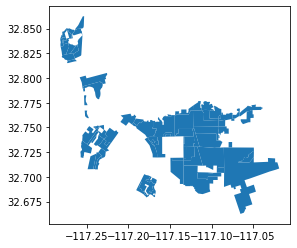

In [13]:
sd.plot()

In [14]:
sd.groupby(by='holc_grade').count() # grouping sd by holc grade

,state,city,name,holc_id,area_description_data,geometry
holc_grade,,,,,,
A,17,17,11,14,17,17
B,27,27,14,23,27,27
C,22,22,15,22,22,22
D,10,10,5,10,10,10


<AxesSubplot:>

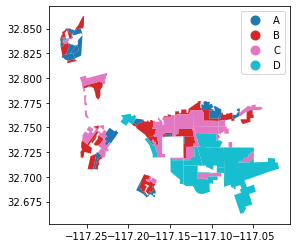

In [15]:
sd.plot(column='holc_grade', categorical=True, legend=True)

In [16]:
from shapely.geometry import box

clipper = gpd.GeoDataFrame(geometry =[box(-117.25, 32.2, -117.03, 32.9)])


## sd holc discrepancies

In [17]:
import contextily as cx
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [18]:
# sd = sd.to_crs(epsg=3857)

In [19]:
code_colors = ['darkgreen', 'steelblue', 'yellow', 'firebrick']

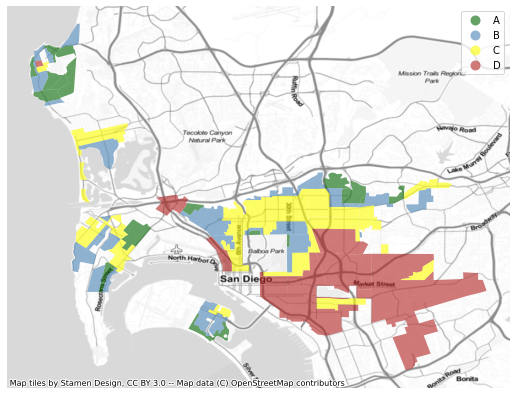

In [20]:
f, ax = plt.subplots(1, figsize=(9, 9))
# Display tile map
#ax.imshow(img, extent=ext)
# Display airports on top
#ax.scatter(air.x, air.y, c='purple', s=2)
# Remove axis
sd.plot(ax=ax, column='holc_grade', categorical=True, legend=True, alpha=.6,
            cmap=ListedColormap(code_colors))
cx.add_basemap(ax, crs=sd.crs.to_string(),
               source = cx.providers.Stamen.TonerLite)
ax.set_axis_off()
# Add title
plt.show()

In [21]:
sd_holes = geoplanar.holes(sd)
sd_holes.total_bounds

/Users/ecv/anaconda3/envs/geoplanar_docs/lib/python3.7/site-packages/geoplanar/hole.py:47: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  _holes = dbu.explode()


array([-117.276698,   32.681134, -117.09362 ,   32.8481  ])

In [22]:
sd_holes.shape

(6, 1)

There are 6 holes in the San Diego HOLC data

### fixing missing holes

In [23]:
sd_fill = geoplanar.fill_holes(sd)

/Users/ecv/anaconda3/envs/geoplanar_docs/lib/python3.7/site-packages/geoplanar/hole.py:47: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  _holes = dbu.explode()
/Users/ecv/anaconda3/envs/geoplanar_docs/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/ecv/anaconda3/envs/geoplanar_docs/lib/python3.7/site-packages/geoplanar/hole.py:111: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  op='intersects')
/Users/ecv/anaconda3/envs/geoplanar_do

In [24]:
sd_fill.area # holes filled in 

/Users/ecv/anaconda3/envs/geoplanar_docs/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


729    0.000061
730    0.000011
731    0.000098
732    0.000130
733    0.000009
         ...   
800    0.000105
801    0.000158
802    0.000230
803    0.000062
804    0.000049
Length: 76, dtype: float64

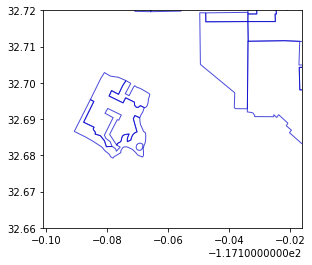

In [25]:
# holc with holes
base = sd.plot(alpha=0.7, facecolor='none', edgecolor='mediumblue')
_ = base.set_xlim(-117.201, -117.116)
_ = base.set_ylim(32.66, 32.72)

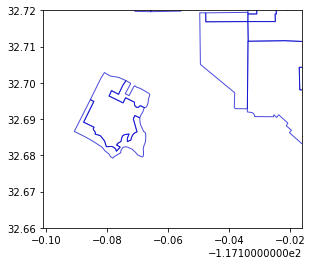

In [26]:
# holc with holes filled in
base = sd_fill.plot(alpha=0.7, facecolor='none', edgecolor='mediumblue')
_ = base.set_xlim(-117.201, -117.116)
_ = base.set_ylim(32.66, 32.72)

### present-day filled areas

In [27]:
import folium

In [28]:
# holc with filled in holes
m = sd_fill.explore(
     column="holc_grade",  # make choropleth based on column
     categorical=True,  # use mapclassify's natural breaks scheme
     name="holc_fill", # name of the layer in the map
     tooltip=False,
     tiles="OpenStreetMap",
     location=[32.687512, -117.178145],
     zoom_start=14
)

# holc without filled in holes
sd.explore(
     m=m, # pass the map object
     column="holc_grade",  # make choropleth based on column
     categorical=True,  # use mapclassify's natural breaks scheme
     name="holc_holes", # name of the layer in the map
     tooltip=False
)



folium.LayerControl().add_to(m)  # layer control
m